In [ ]:
!pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 97.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.


Android Malware Analysis

In this notebook I would like to share some of my research results, I'm going to explain to the interested of this cybersecurity area how I used data science in order to train machine learning mechanisms to detect threats, especially, for this part, I abstracted some of the ideas from my book [1] and others articles, which I will use during the explanation about this topic.

This research is for me as my philanthropy work, so please the idea of this sharing is to get feedback, networking and cites about these results (hacker culture ☠)

Android

Android is one of the most used mobile operating systems worldwide. Due to its technological impact, its open-source code and the possibility of installing applications from third parties without any central control, Android has recently become a malware target. Even if it includes security mechanisms, the last news about malicious activities and Android´s vulnerabilities point to the importance of continuing the development of methods and frameworks to improve its security.

To prevent malware attacks, researches and developers have proposed different security solutions, applying static analysis, dynamic analysis, and artificial intelligence. Indeed, data science has become a promising area in cybersecurity, since analytical models based on data allow for the discovery of insights that can help to predict malicious activities.

We can analyze cyber threats using two techniques, static analysis, and dynamic analysis, the most important thing is that these are the approaches to get the features that we are going to use in data science.

    Static analysis: it includes the methods that allow us to get information about the software that we want to analyze without executing it, one example of them is the study of the code, their callings, resources, etc.
    Dynamic analysis: it is another approach where the idea is to analyze the cyber threat during its execution, in other words, get information about its behavior, some of their features are the netflows.



State of the Art

In 2016 we published an article [2] about the state of the art of frameworks and results about Android malware detection. This work reflects different static analysis tools (TaintDroid, Stowaway, Crowdroid y Airmid), dynamic analysis systems (Paranoid and DroidMOSS), frameworks (MobSafe, SAAF, and ASEF) and some research results about using machine learning. From this article we concluded that the idea is using both static and dynamic analysis in order to get spectra of features, moreover, some works have been working to use virtual devices in the cloud.



Datasets

In 2016 we explored [3] Android Genome Project (MalGenome), it is a dataset which was active from 2012 until the end of the year 2015, this set of malware has a size of 1260 applications, grouped into a total of 49 families. Today, we can find other jobs such as: Drebin, a research project offering a total of 5560 applications consisting of 179 malware families; AndrooZoo, which includes a collection of 5669661 applications Android from different sources (including Google Play); VirusShare, another repository that provides samples of malware for cybersecurity researchers; and DroidCollector, this is another set which provides around 8000 benign applications and 5560 malware samples, moreover, it facilitates us samples of network traffic as pcap files.


Static Analysis

In this first step, I'm going to analyze some features in order to answer the next hypothesis, exist a differential of the permissions used between a set of malware and benign samples, in other words…

For this approach, I developed a code that consisted to extract and make a CSV file which has information about permissions of applications, through this script you can map each APK (Android Application Package) against a list of permissions. You can find more information about the proposed framework at [3]

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn import preprocessing
import torch
from sklearn import svm
from sklearn import tree
import pandas as pd
import numpy as np
import seaborn as sns



Exploratory

For the next analysis, I'm going to explore the Malgenome dataset, as I said nowadays we can find other sources with a lot of examples and malware families which would be important for future works, the idea of the next experiment and results is to show our first approached.

In [ ]:
import pandas as pd
from google.colab import files
filenya=files.upload()

In [ ]:
filenya

{'train.csv': b'android;android.app.cts.permission.TEST_GRANTED;android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE;android.os.cts.permission.TEST_GRANTED;android.permission.ACCESS_ALL_DOWNLOADS;android.permission.ACCESS_ALL_EXTERNAL_STORAGE;android.permission.ACCESS_BLUETOOTH_SHARE;android.permission.ACCESS_CACHE_FILESYSTEM;android.permission.ACCESS_CHECKIN_PROPERTIES;android.permission.ACCESS_COARSE_LOCATION;android.permission.ACCESS_CONTENT_PROVIDERS_EXTERNALLY;android.permission.ACCESS_DOWNLOAD_MANAGER;android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED;android.permission.ACCESS_DRM_CERTIFICATES;android.permission.ACCESS_FINE_LOCATION;android.permission.ACCESS_FM_RADIO;android.permission.ACCESS_INPUT_FLINGER;android.permission.ACCESS_KEYGUARD_SECURE_STORAGE;android.permission.ACCESS_LOCATION_EXTRA_COMMANDS;android.permission.ACCESS_MOCK_LOCATION;android.permission.ACCESS_MTP;android.permission.ACCESS_NETWORK_CONDITIONS;android.permission.ACCESS_NETWORK_STATE;android.permiss

In [ ]:
#convert file into dataset
data = pd.read_csv('train.csv',sep=";")
#explore first five rows in the dataset
data.head()
data.info()

In [ ]:
data.describe()

,android,android.app.cts.permission.TEST_GRANTED,android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE,android.os.cts.permission.TEST_GRANTED,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_ALL_EXTERNAL_STORAGE,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_COARSE_LOCATION,...,com.android.voicemail.permission.WRITE_VOICEMAIL,com.foo.mypermission,com.foo.mypermission2,org.chromium.chrome.shell.permission.C2D_MESSAGE,org.chromium.chrome.shell.permission.DEBUG,org.chromium.chrome.shell.permission.SANDBOX,org.chromium.chromecast.shell.permission.SANDBOX,org.chromium.content_shell.permission.SANDBOX,test_permission,type
count,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.000000,398.0,398.000000,...,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005025,0.0,0.233668,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070799,0.0,0.423696,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500629
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000


In [ ]:
data = data.astype("int64")
data.type.value_counts()

1    199
0    199
Name: type, dtype: int64

In [ ]:
data.shape

(398, 331)

In [ ]:
pd.Series.sort_values(data[data.type==1].sum(axis=0), ascending=False)[1:11]

android.permission.INTERNET                  195
android.permission.READ_PHONE_STATE          190
android.permission.ACCESS_NETWORK_STATE      167
android.permission.WRITE_EXTERNAL_STORAGE    136
android.permission.ACCESS_WIFI_STATE         135
android.permission.READ_SMS                  124
android.permission.WRITE_SMS                 104
android.permission.RECEIVE_BOOT_COMPLETED    102
android.permission.ACCESS_COARSE_LOCATION     80
android.permission.CHANGE_WIFI_STATE          75
dtype: int64

In [ ]:
pd.Series.sort_values(data[data.type==0].sum(axis=0), ascending=False)[:10]

android.permission.INTERNET                  104
android.permission.WRITE_EXTERNAL_STORAGE     76
android.permission.ACCESS_NETWORK_STATE       62
android.permission.WAKE_LOCK                  36
android.permission.RECEIVE_BOOT_COMPLETED     30
android.permission.ACCESS_WIFI_STATE          29
android.permission.READ_PHONE_STATE           24
android.permission.VIBRATE                    21
android.permission.ACCESS_FINE_LOCATION       18
android.permission.READ_EXTERNAL_STORAGE      15
dtype: int64

<AxesSubplot:>

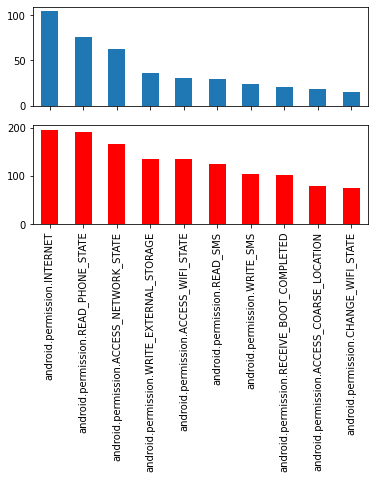

In [ ]:
import matplotlib.pyplot as plt
fig, axs =  plt.subplots(nrows=2, sharex=True)

pd.Series.sort_values(data[data.type==0].sum(axis=0), ascending=False)[:10].plot.bar(ax=axs[0])
pd.Series.sort_values(data[data.type==1].sum(axis=0), ascending=False)[1:11].plot.bar(ax=axs[1], color="red")

In [ ]:
data.describe()

,android,android.app.cts.permission.TEST_GRANTED,android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE,android.os.cts.permission.TEST_GRANTED,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_ALL_EXTERNAL_STORAGE,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_COARSE_LOCATION,...,com.android.voicemail.permission.WRITE_VOICEMAIL,com.foo.mypermission,com.foo.mypermission2,org.chromium.chrome.shell.permission.C2D_MESSAGE,org.chromium.chrome.shell.permission.DEBUG,org.chromium.chrome.shell.permission.SANDBOX,org.chromium.chromecast.shell.permission.SANDBOX,org.chromium.content_shell.permission.SANDBOX,test_permission,type
count,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.000000,398.0,398.000000,...,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005025,0.0,0.233668,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070799,0.0,0.423696,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500629
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:330], data['type'], test_size=0.20, random_state=42)

In [ ]:
# Naive Bayes algorithm
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# pred
pred = gnb.predict(X_test)

# accuracy
accuracy = accuracy_score(pred, y_test)
print("naive_bayes")
print(accuracy)
print(classification_report(pred, y_test, labels=None))

naive_bayes
0.8375
              precision    recall  f1-score   support

           0       0.91      0.76      0.83        41
           1       0.78      0.92      0.85        39

    accuracy                           0.84        80
   macro avg       0.85      0.84      0.84        80
weighted avg       0.85      0.84      0.84        80



In [ ]:
for i in range(3,15,3):

    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    pred = neigh.predict(X_test)
    # accuracy
    accuracy = accuracy_score(pred, y_test)
    print("kneighbors {}".format(i))
    print(accuracy)
    print(classification_report(pred, y_test, labels=None))
    print("")

kneighbors 3
0.8875
              precision    recall  f1-score   support

           0       0.94      0.82      0.88        39
           1       0.85      0.95      0.90        41

    accuracy                           0.89        80
   macro avg       0.89      0.89      0.89        80
weighted avg       0.89      0.89      0.89        80


kneighbors 6
0.85
              precision    recall  f1-score   support

           0       0.94      0.76      0.84        42
           1       0.78      0.95      0.86        38

    accuracy                           0.85        80
   macro avg       0.86      0.85      0.85        80
weighted avg       0.87      0.85      0.85        80


kneighbors 9
0.8625
              precision    recall  f1-score   support

           0       0.94      0.78      0.85        41
           1       0.80      0.95      0.87        39

    accuracy                           0.86        80
   macro avg       0.87      0.86      0.86        80
weighted avg  

In [ ]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Read the csv test file

pred = clf.predict(X_test)
# accuracy
accuracy = accuracy_score(pred, y_test)
print(clf)
print(accuracy)
print(classification_report(pred, y_test, labels=None))



DecisionTreeClassifier()
0.9375
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        37
           1       0.91      0.98      0.94        43

    accuracy                           0.94        80
   macro avg       0.94      0.93      0.94        80
weighted avg       0.94      0.94      0.94        80



In [ ]:
import pandas as pd
from google.colab import files
filenya=files.upload()

Saving android_traffic.csv to android_traffic.csv


In [ ]:
filenya

{'android_traffic.csv': b'name;tcp_packets;dist_port_tcp;external_ips;vulume_bytes;udp_packets;tcp_urg_packet;source_app_packets;remote_app_packets;source_app_bytes;remote_app_bytes;duracion;avg_local_pkt_rate;avg_remote_pkt_rate;source_app_packets;dns_query_times;type\r\nAntiVirus;36;6;3;3911;0;0;39;33;5100;4140;NA;NA;NA;39;3;benign\r\nAntiVirus;117;0;9;23514;0;0;128;107;26248;24358;NA;NA;NA;128;11;benign\r\nAntiVirus;196;0;6;24151;0;0;205;214;163887;24867;NA;NA;NA;205;9;benign\r\nAntiVirus;6;0;1;889;0;0;7;6;819;975;NA;NA;NA;7;1;benign\r\nAntiVirus;6;0;1;882;0;0;7;6;819;968;NA;NA;NA;7;1;benign\r\nAntiVirus;54;54;3;5062;0;0;63;54;5457;5719;NA;NA;NA;63;9;benign\r\nAntiVirus;6;0;1;889;0;0;7;6;819;975;NA;NA;NA;7;1;benign\r\nAntiVirus;6;0;1;1154;0;0;7;6;593;1228;NA;NA;NA;7;1;benign\r\nAntiVirus;6;0;1;888;0;0;7;6;819;974;NA;NA;NA;7;1;benign\r\nAntiVirus;196;0;3;16110;0;0;200;264;300472;16410;NA;NA;NA;200;4;benign\r\nAntiVirus;226;0;10;34063;0;0;240;249;187514;35139;NA;NA;NA;240;14;benign\r\

In [ ]:
import pandas as pd
data = pd.read_csv("../input/network-traffic-android-malware/android_traffic.csv", sep=";")
data.head()

In [ ]:
#convert file into dataset
data = pd.read_csv('android_traffic.csv',sep=";")
#explore first five rows in the dataset
data.head()

,name,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,duracion,avg_local_pkt_rate,avg_remote_pkt_rate,source_app_packets.1,dns_query_times,type
0,AntiVirus,36,6,3,3911,0,0,39,33,5100,4140,NaN,NaN,NaN,39,3,benign
1,AntiVirus,117,0,9,23514,0,0,128,107,26248,24358,NaN,NaN,NaN,128,11,benign
2,AntiVirus,196,0,6,24151,0,0,205,214,163887,24867,NaN,NaN,NaN,205,9,benign
3,AntiVirus,6,0,1,889,0,0,7,6,819,975,NaN,NaN,NaN,7,1,benign
4,AntiVirus,6,0,1,882,0,0,7,6,819,968,NaN,NaN,NaN,7,1,benign


In [ ]:
data.columns

Index(['name', 'tcp_packets', 'dist_port_tcp', 'external_ips', 'vulume_bytes',
       'udp_packets', 'tcp_urg_packet', 'source_app_packets',
       'remote_app_packets', 'source_app_bytes', 'remote_app_bytes',
       'duracion', 'avg_local_pkt_rate', 'avg_remote_pkt_rate',
       'source_app_packets.1', 'dns_query_times', 'type'],
      dtype='object')

In [ ]:


data.shape



(7845, 17)

In [ ]:
data.type.value_counts()

benign       4704
malicious    3141
Name: type, dtype: int64

In [ ]:


data.isna().sum()



name                       0
tcp_packets                0
dist_port_tcp              0
external_ips               0
vulume_bytes               0
udp_packets                0
tcp_urg_packet             0
source_app_packets         0
remote_app_packets         0
source_app_bytes           0
remote_app_bytes           0
duracion                7845
avg_local_pkt_rate      7845
avg_remote_pkt_rate     7845
source_app_packets.1       0
dns_query_times            0
type                       0
dtype: int64

In [ ]:
data = data.drop(['duracion','avg_local_pkt_rate','avg_remote_pkt_rate'], axis=1).copy()

In [ ]:
data.describe()

,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,source_app_packets.1,dns_query_times
count,7845.000000,7845.000000,7845.000000,7.845000e+03,7845.000000,7845.000000,7845.000000,7845.000000,7.845000e+03,7.845000e+03,7845.000000,7845.000000
mean,147.578713,7.738177,2.748502,1.654375e+04,0.056724,0.000255,152.911918,194.706310,2.024967e+05,1.692260e+04,152.911918,4.898917
std,777.920084,51.654222,2.923005,8.225650e+04,1.394046,0.015966,779.034618,1068.112696,1.401076e+06,8.238182e+04,779.034618,18.900478
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000e+00,6.900000e+01,1.000000,0.000000
25%,6.000000,0.000000,1.000000,8.880000e+02,0.000000,0.000000,7.000000,7.000000,9.340000e+02,1.046000e+03,7.000000,1.000000
50%,25.000000,0.000000,2.000000,3.509000e+03,0.000000,0.000000,30.000000,24.000000,4.090000e+03,3.803000e+03,30.000000,3.000000
75%,93.000000,0.000000,4.000000,1.218900e+04,0.000000,0.000000,98.000000,92.000000,2.624400e+04,1.261000e+04,98.000000,5.000000
max,37143.000000,2167.000000,43.000000,4.226790e+06,65.000000,1.000000,37150.000000,45928.000000,6.823516e+07,4.227323e+06,37150.000000,913.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='tcp_urg_packet'>

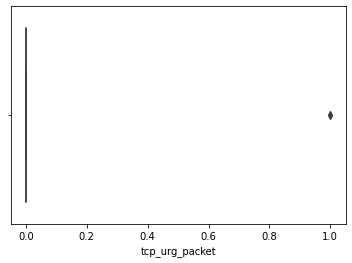

In [ ]:
sns.boxplot(data.tcp_urg_packet)

In [ ]:


data.loc[data.tcp_urg_packet > 0].shape[0]



2

In [ ]:
data = data.drop(columns=["tcp_urg_packet"], axis=1).copy()
data.shape

(7845, 13)

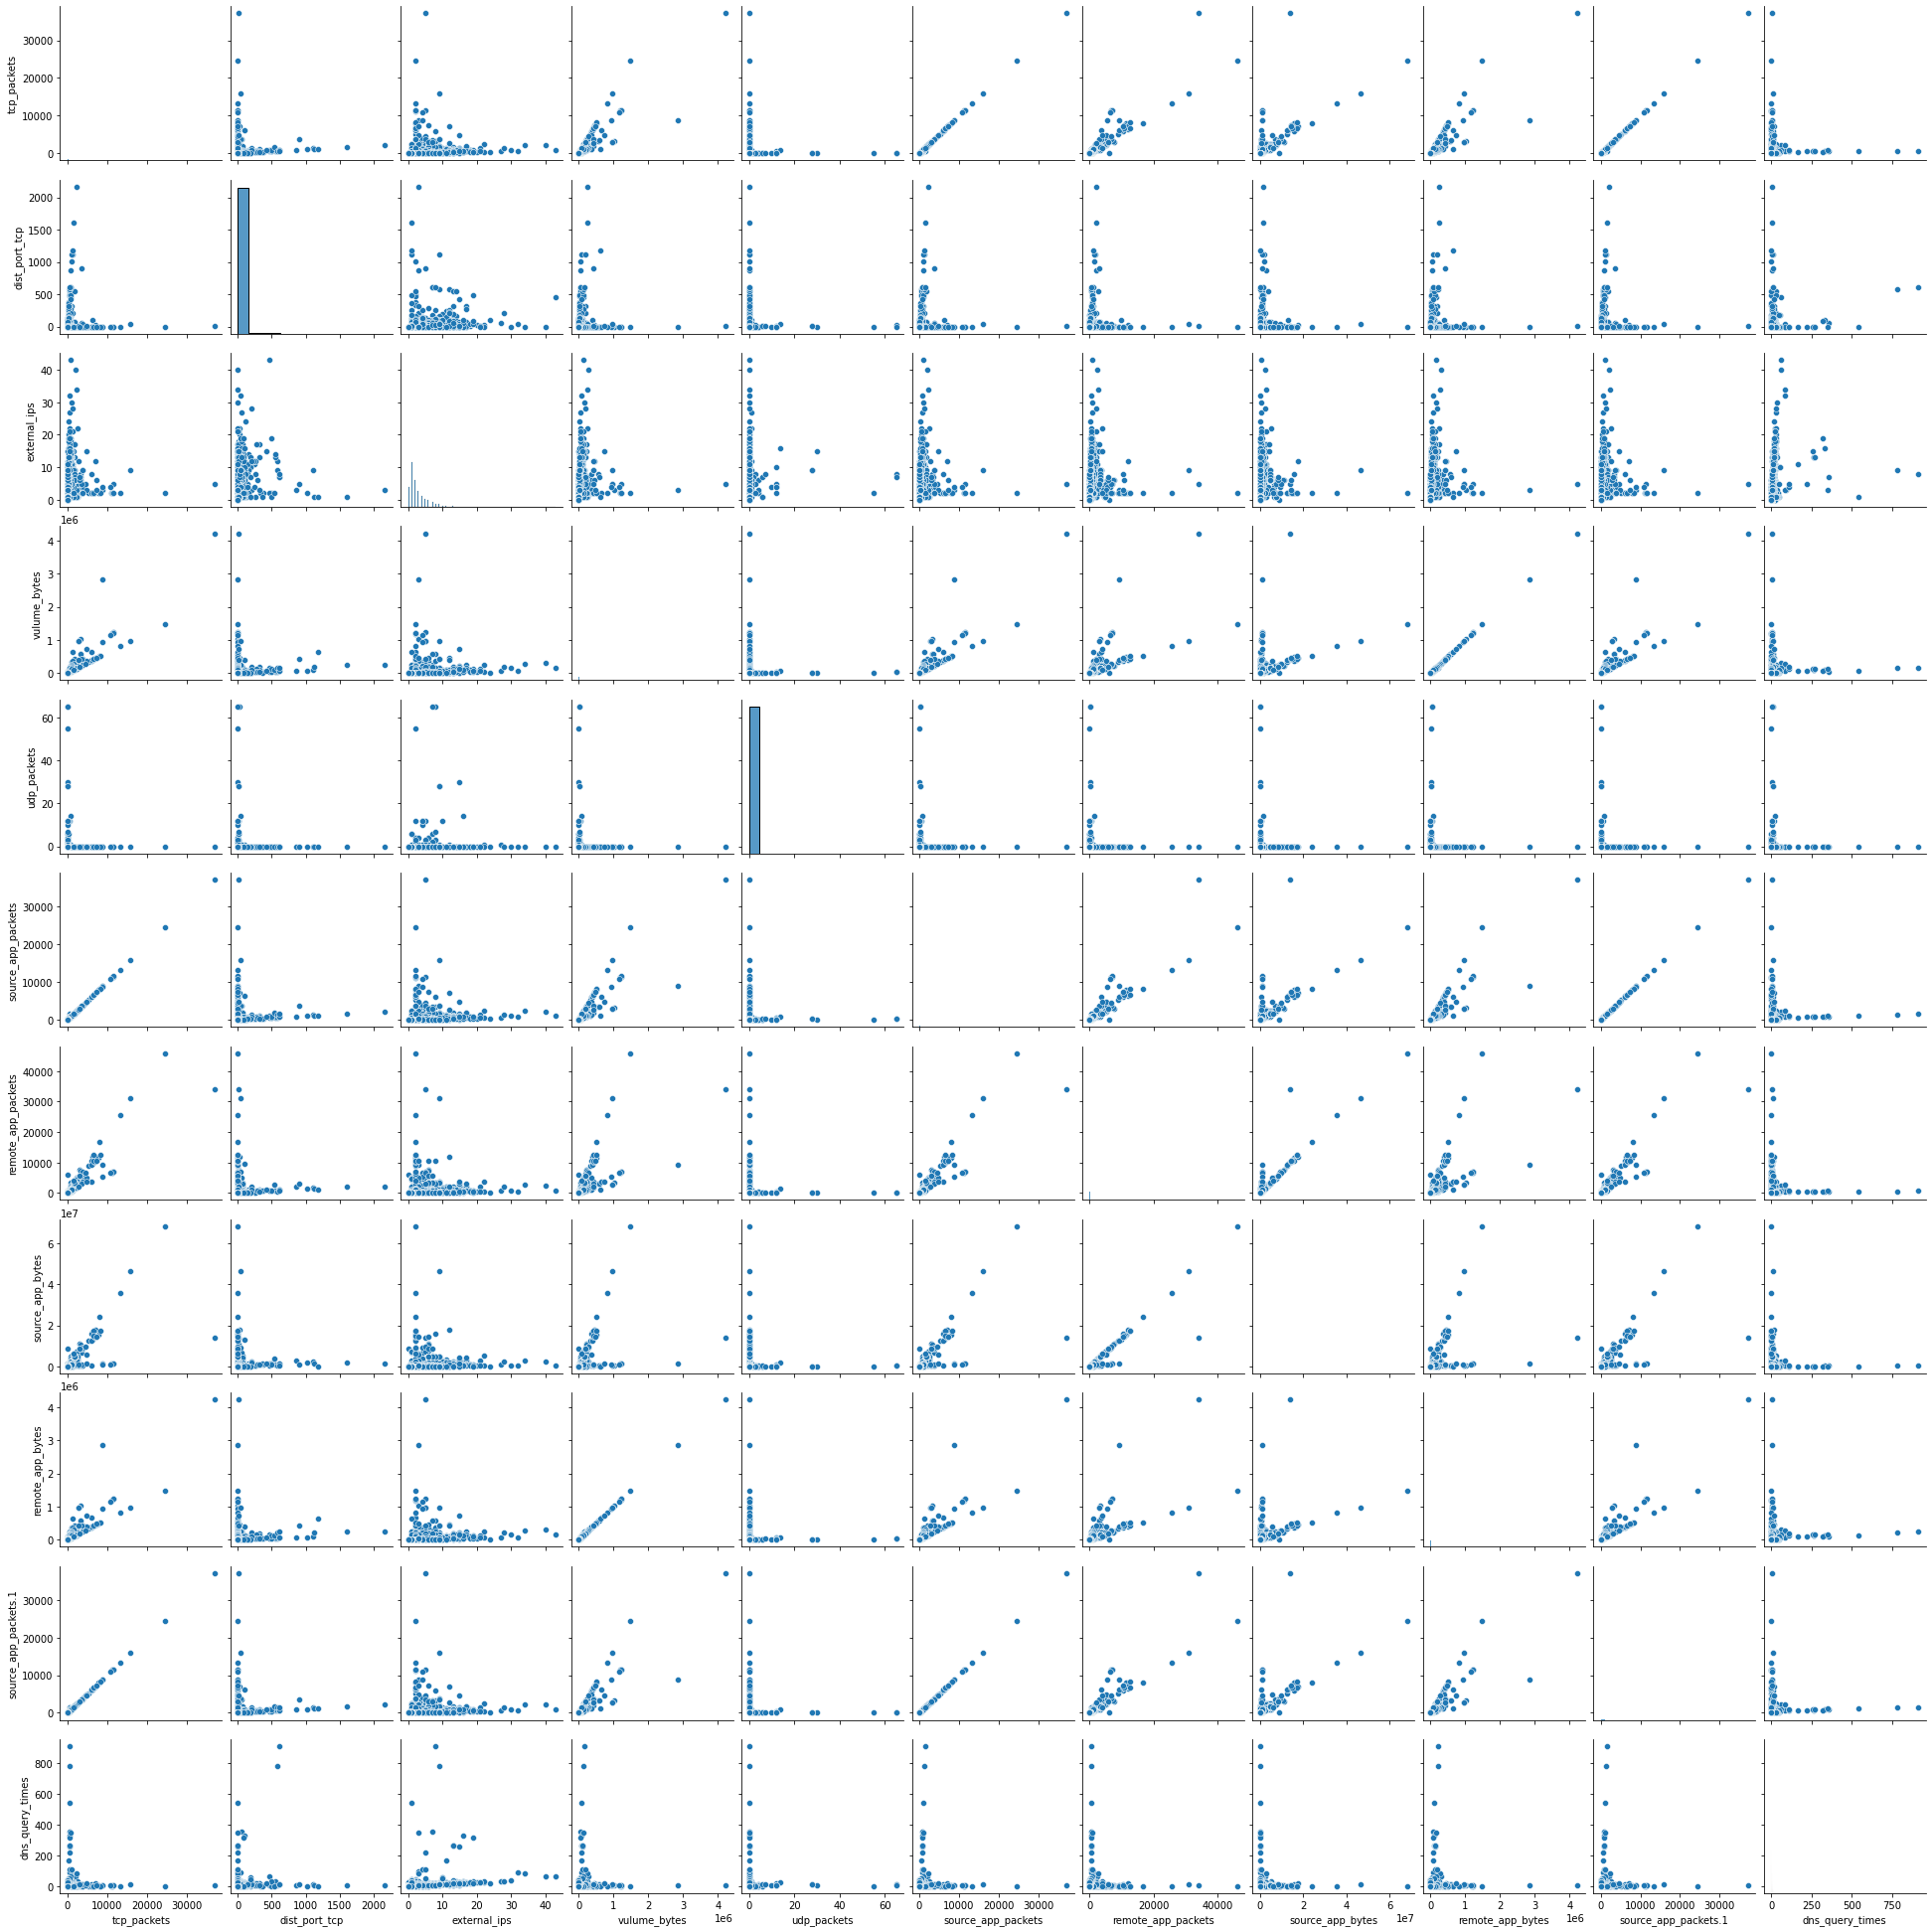

In [ ]:
sns.pairplot(data)

In [ ]:
data=data[data.tcp_packets<20000].copy()
data=data[data.dist_port_tcp<1400].copy()
data=data[data.external_ips<35].copy()
data=data[data.vulume_bytes<2000000].copy()
data=data[data.udp_packets<40].copy()
data=data[data.remote_app_packets<15000].copy()

In [ ]:
data[data.duplicated()].sum()

name                    AntiVirusAntiVirusAntiVirusAntiVirusAntiVirusA...
tcp_packets                                                         15038
dist_port_tcp                                                        3514
external_ips                                                         1434
vulume_bytes                                                      2061210
udp_packets                                                            38
source_app_packets                                                  21720
remote_app_packets                                                  18841
source_app_bytes                                                  8615120
remote_app_bytes                                                  2456160
source_app_packets.1                                                21720
dns_query_times                                                      5095
type                    benignbenignbenignbenignbenignbenignbenignbeni...
dtype: object

In [ ]:


data=data.drop('source_app_packets.1',axis=1).copy()



In [ ]:


scaler = preprocessing.RobustScaler()
scaledData = scaler.fit_transform(data.iloc[:,1:11])
scaledData = pd.DataFrame(scaledData, columns=['tcp_packets','dist_port_tcp','external_ips','vulume_bytes','udp_packets','source_app_packets','remote_app_packets',' source_app_bytes','remote_app_bytes','dns_query_times'])



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaledData.iloc[:,0:10], data.type.astype("str"), test_size=0.25, random_state=45)

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)
## accuracy
accuracy = accuracy_score(y_test,pred)
print("naive_bayes")
print(accuracy)
print(classification_report(y_test,pred, labels=None))
print("cohen kappa score")
print(cohen_kappa_score(y_test, pred))

naive_bayes
0.44688457609805926
              precision    recall  f1-score   support

      benign       0.81      0.12      0.20      1190
   malicious       0.41      0.96      0.58       768

    accuracy                           0.45      1958
   macro avg       0.61      0.54      0.39      1958
weighted avg       0.66      0.45      0.35      1958

cohen kappa score
0.06082933470572538


In [ ]:
# kneighbors algorithm

for i in range(3,15,3):

    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    pred = neigh.predict(X_test)
    # accuracy
    accuracy = accuracy_score(pred, y_test)
    print("kneighbors {}".format(i))
    print(accuracy)
    print(classification_report(pred, y_test, labels=None))
    print("cohen kappa score")
    print(cohen_kappa_score(y_test, pred))
    print("")

kneighbors 3
0.8891726251276814
              precision    recall  f1-score   support

      benign       0.89      0.92      0.91      1155
   malicious       0.88      0.84      0.86       803

    accuracy                           0.89      1958
   macro avg       0.89      0.88      0.88      1958
weighted avg       0.89      0.89      0.89      1958

cohen kappa score
0.7694107814458838

kneighbors 6
0.8825331971399387
              precision    recall  f1-score   support

      benign       0.92      0.89      0.90      1222
   malicious       0.83      0.87      0.85       736

    accuracy                           0.88      1958
   macro avg       0.87      0.88      0.88      1958
weighted avg       0.88      0.88      0.88      1958

cohen kappa score
0.7517879819393982

kneighbors 9
0.874361593462717
              precision    recall  f1-score   support

      benign       0.89      0.90      0.90      1166
   malicious       0.86      0.83      0.84       792

    accurac

In [ ]:
rdF=RandomForestClassifier(n_estimators=250, max_depth=50,random_state=45)
rdF.fit(X_train,y_train)
pred=rdF.predict(X_test)
cm=confusion_matrix(y_test, pred)

accuracy = accuracy_score(y_test,pred)
print(rdF)
print(accuracy)
print(classification_report(y_test,pred, labels=None))
print("cohen kappa score")
print(cohen_kappa_score(y_test, pred))
print(cm)

RandomForestClassifier(max_depth=50, n_estimators=250, random_state=45)
0.9172625127681308
              precision    recall  f1-score   support

      benign       0.93      0.94      0.93      1190
   malicious       0.90      0.88      0.89       768

    accuracy                           0.92      1958
   macro avg       0.91      0.91      0.91      1958
weighted avg       0.92      0.92      0.92      1958

cohen kappa score
0.8258206083396299
[[1117   73]
 [  89  679]]



Conclusions

Great 💪🤖!!, now we have seen the two approaches to analyze a cyber threat. Of course we can use a lot of variables that in this case we didn't use them, for example netflows, methods callings, graph analysis, and many others, but the idea behind this work is to understand that we need to pay attention of all of the environments because when we are working in cybersecurity we face with a complex problem.

I'm going to continue with my cybersecurity kernels, in spite of this is the first one, this kernel will be updated once I find an improvement and new results.

Some of the next kernels that I will publish are:

    Malicious Websites Detection
    Secure Learning
    Cyber Web Attacks Detection
    Deep Fakes Detection


